In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h2 align="center" style="color:blue">Data Loading</h2>

In [2]:
df = pd.read_excel("premiums_rest.xlsx")

In [3]:
df["Genetical_Risk"] = 0

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [5]:
print("No. of Rows and Columns are : ",df.shape)

No. of Rows and Columns are :  (29904, 14)


In [6]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


<h2 align="center" style="color:blue">Exploratory Data Analysis</h2>

In [7]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates().sum()
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


## Data Cleaning

In [12]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-1, -3])

There are some negative values in number_of_dependants columns. We can replace them with positive numbers

In [13]:
df['number_of_dependants'] = df['number_of_dependants'].abs()
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


## Univariate Analysis : Numeric Columns

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

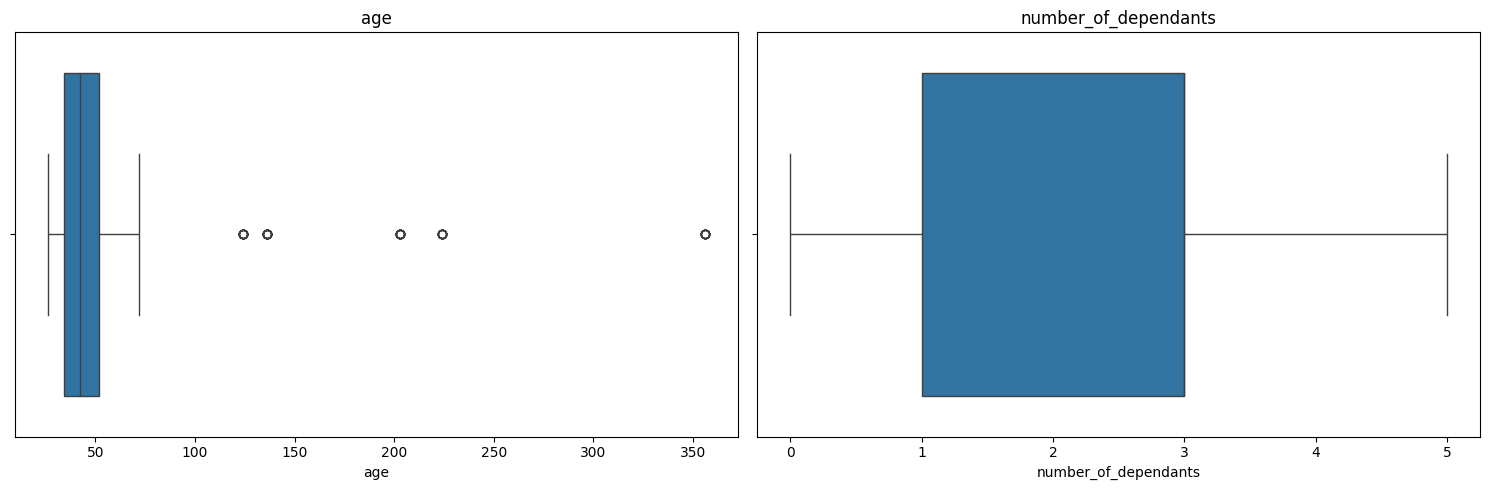

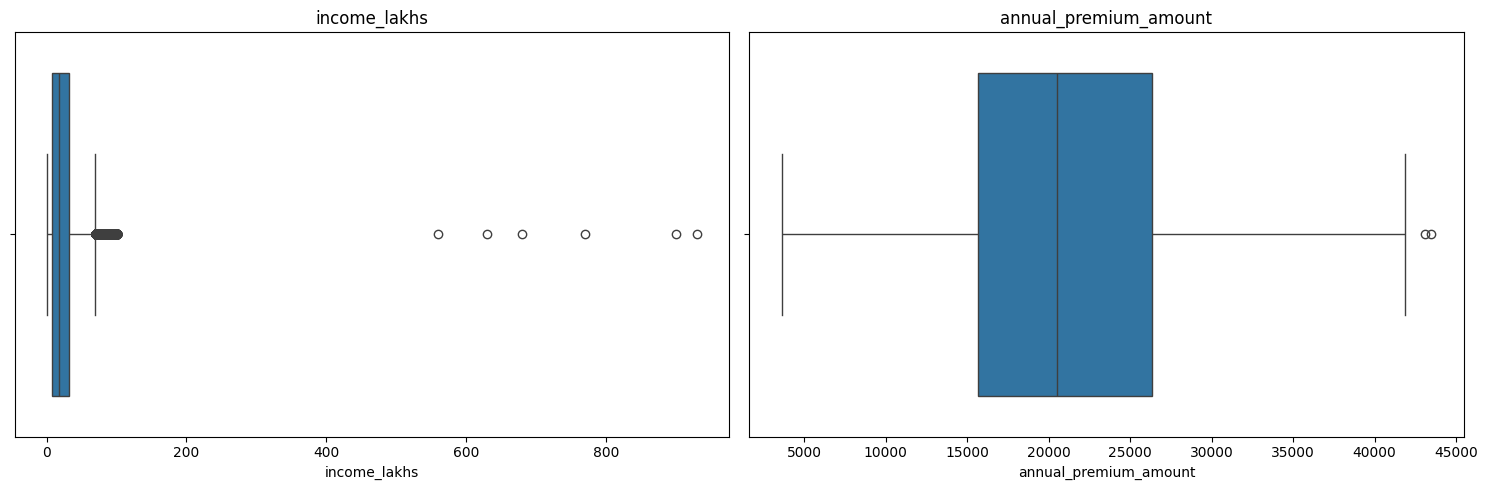

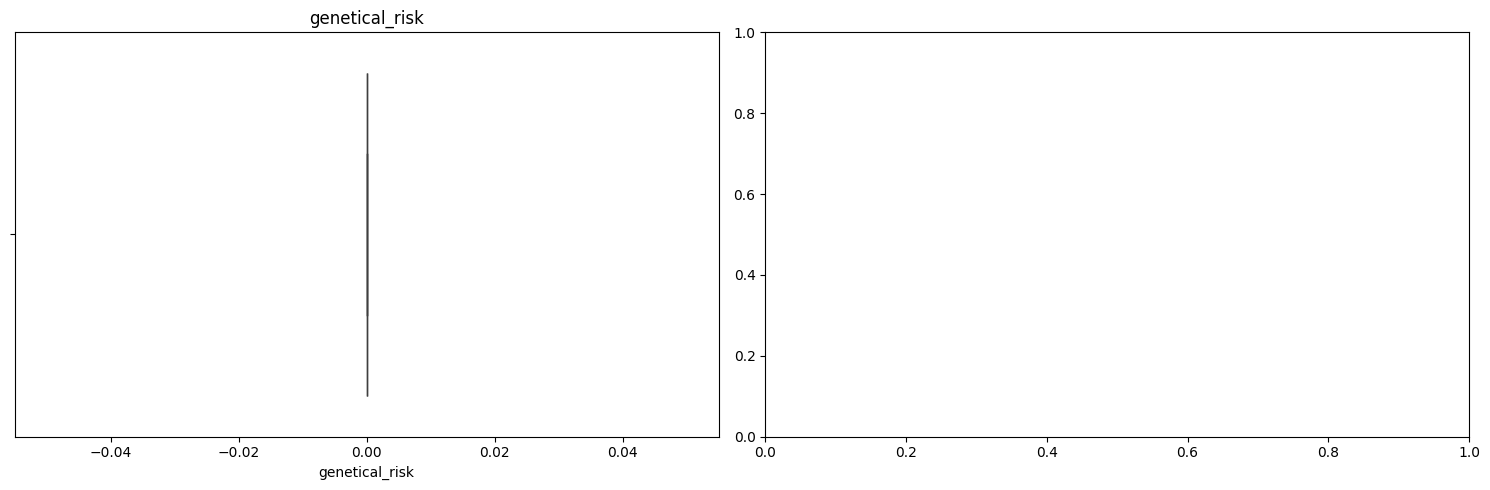

In [15]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if i < len(numeric_columns):
        sns.boxplot(ax=axes[0], x=df[numeric_columns[i]])
        axes[0].set_title(numeric_columns[i])
    
    if i + 1 < len(numeric_columns):
        sns.boxplot(ax=axes[1], x=df[numeric_columns[i + 1]])
        axes[1].set_title(numeric_columns[i + 1])
    
    plt.tight_layout()
    plt.show()

## Outlier Treatment : Age column

In [16]:
df[df["age"]>100]["age"].unique()

array([224, 124, 136, 203, 356])

In [17]:
df1 = df[df["age"]<=100]

In [18]:
df1.age.describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

## Outlier Treatment : Income_lakhs column

In [19]:
quantile_thresold = df1['income_lakhs'].quantile(0.999)
quantile_thresold

np.float64(100.0)

In [20]:
df1[df1.income_lakhs>quantile_thresold].shape

(6, 14)

In [21]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.income_lakhs.describe()

count    29822.000000
mean        23.226343
std         22.455408
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        100.000000
Name: income_lakhs, dtype: float64

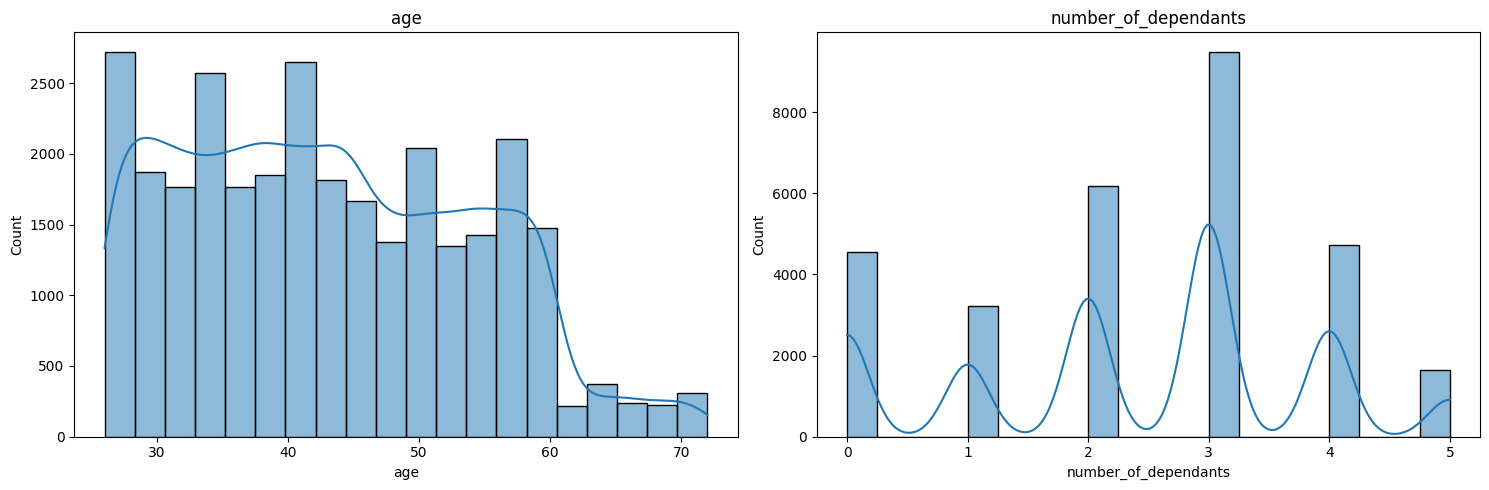

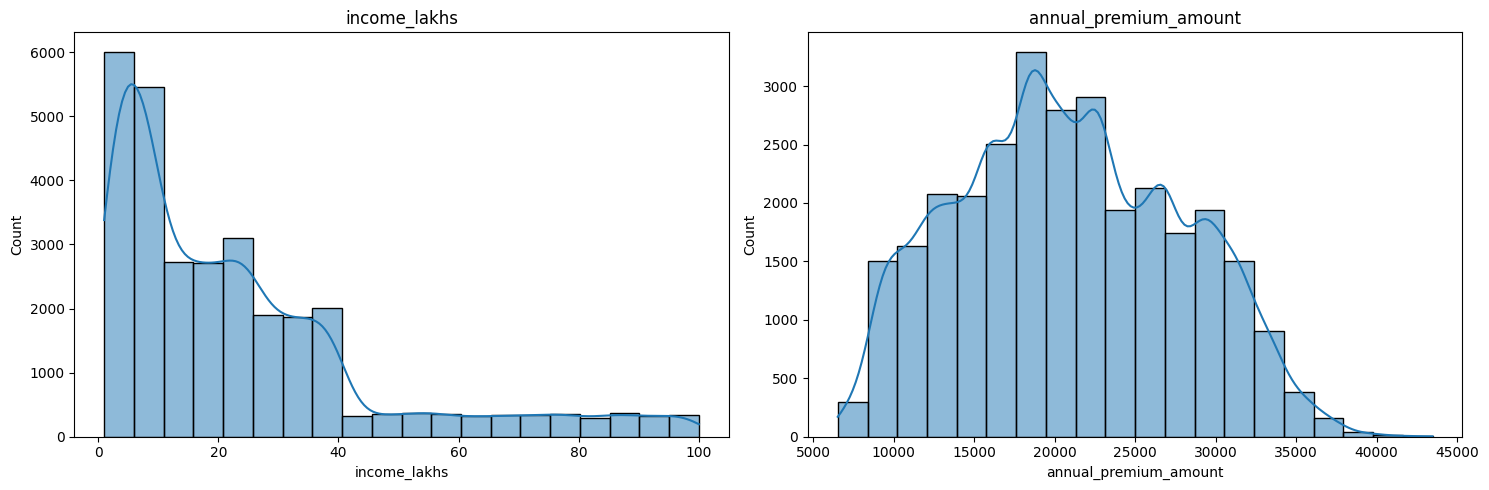

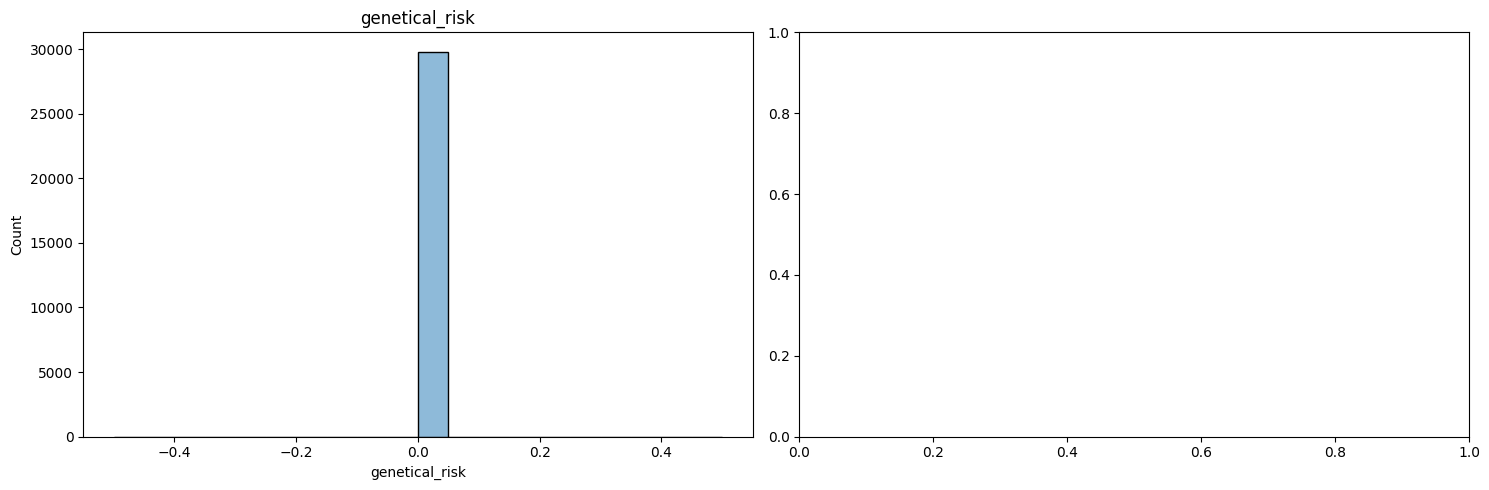

In [22]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if i < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i]], bins=20, kde=True, ax=axes[0], edgecolor='black')
        axes[0].set_title(numeric_columns[i])
    
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i + 1]], bins=20, kde=True, ax=axes[1], edgecolor='black')
        axes[1].set_title(numeric_columns[i + 1])
    
    plt.tight_layout()
    plt.show()

## Bivariate Analysis : Numeric colunms

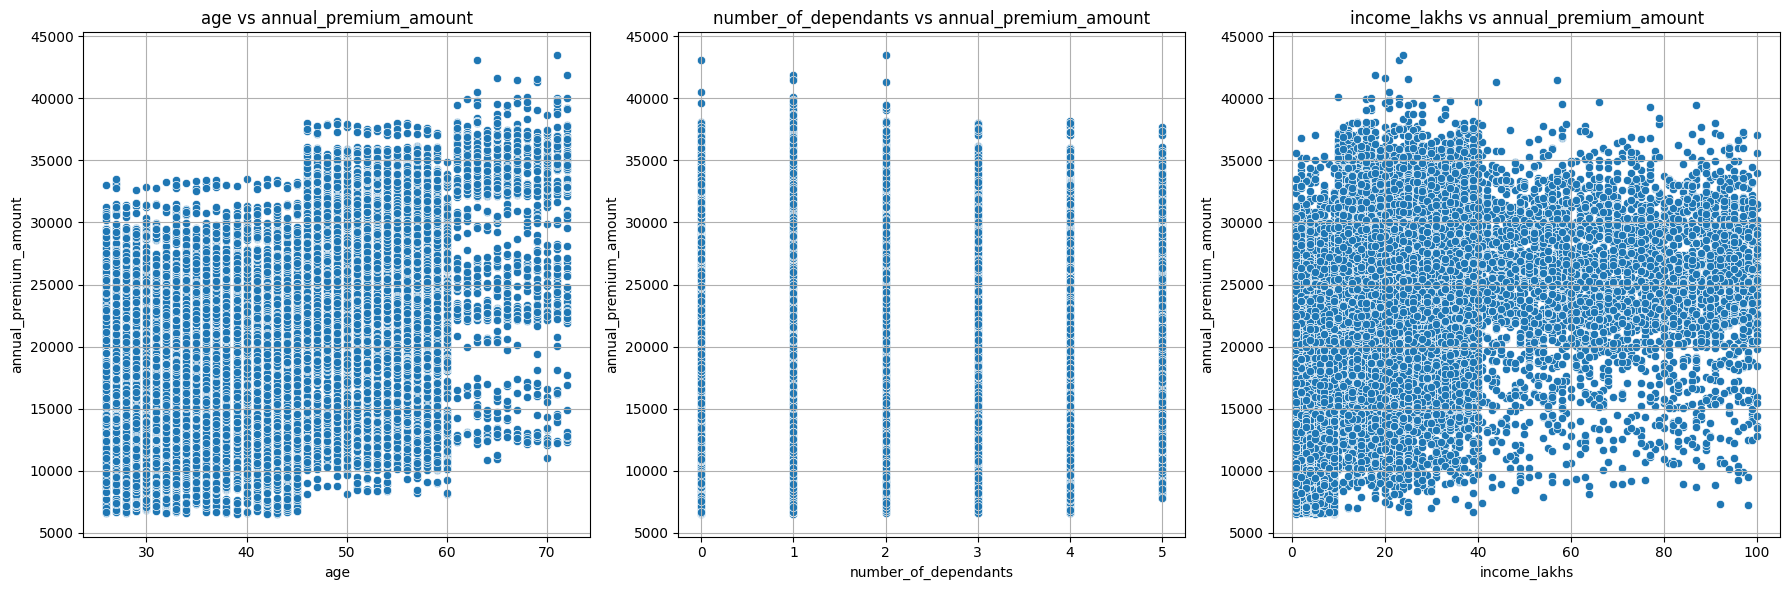

In [23]:
# Columns to plot
columns_to_plot = ['age', 'number_of_dependants', 'income_lakhs']
target_column = 'annual_premium_amount'

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 6))

# Loop through the columns and create scatter plots
for ax, col in zip(axes, columns_to_plot):
    sns.scatterplot(data=df2, x=col, y=target_column, ax=ax)
    ax.set_title(f'{col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Categorical Columns

In [24]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan', 'genetical_risk' ]
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']
genetical_risk : [0]


In [25]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional', 'Does Not Smoke',
       'Not Smoking', 'Smoking=0'], dtype=object)

In [26]:
df2['smoking_status'] = df2['smoking_status'].replace({
            'Smoking=0' : 'No Smoking',
            'Does Not Smoke' : 'No Smoking',
            'Not Smoking' : 'No Smoking'
})
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

## Univariate Analysis

In [27]:
pct_count = df2['gender'].value_counts(normalize = True)
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

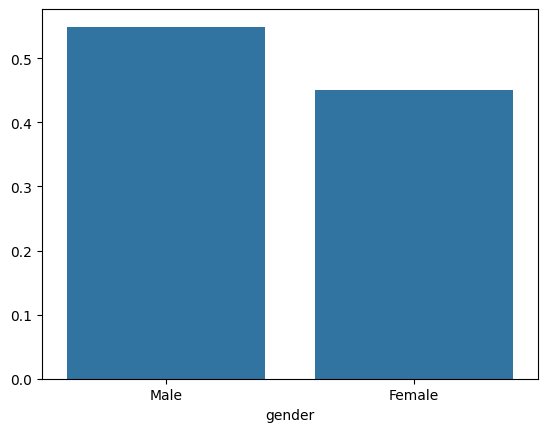

In [28]:
sns.barplot(x = pct_count.index, y = pct_count.values)
plt.show()

C:\Users\zahee\AppData\Local\Temp\ipykernel_25308\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_25308\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_25308\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_25308\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

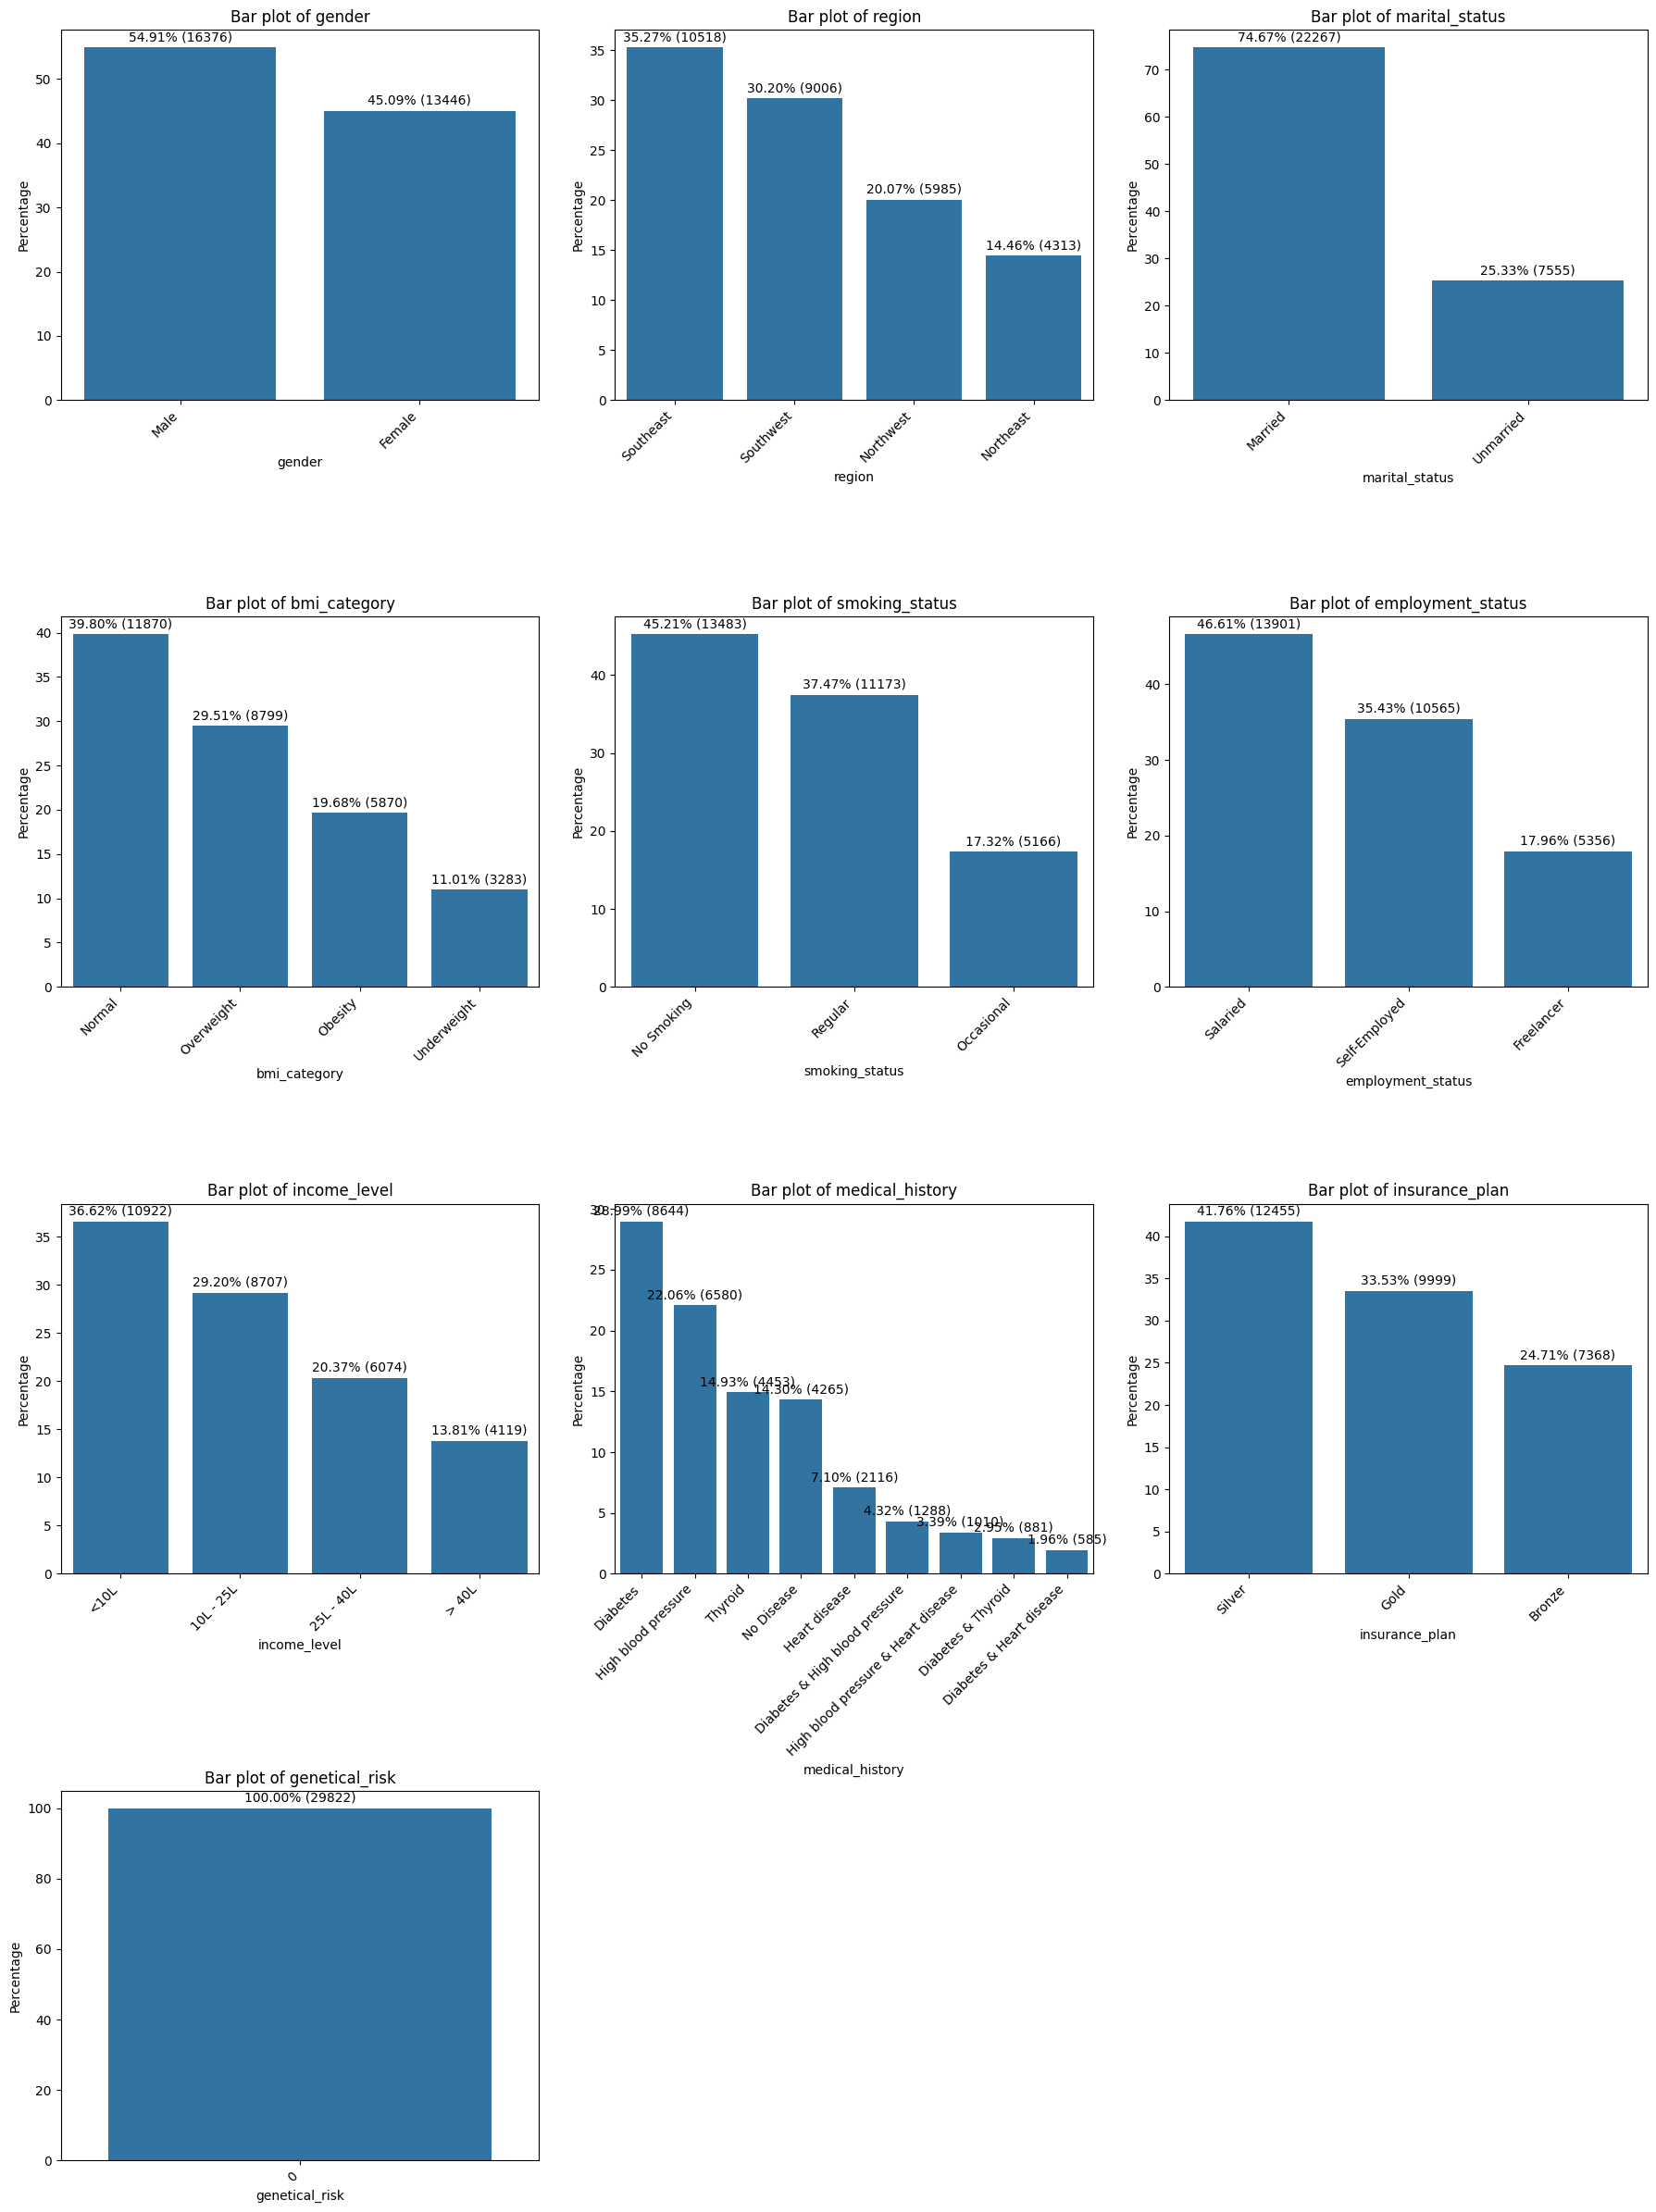

In [29]:

# Determine number of rows and columns for subplots
num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axs = axs.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    ax = axs[i]
    plot_data = df2[col].value_counts(normalize=True) * 100
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=ax)
    ax.set_title(f'Bar plot of {col}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)

    # Add text annotations for percentage and value
    for p, val in zip(ax.patches, df2[col].value_counts()):
        percentage = f'{p.get_height():.2f}%'
        value = f' ({val})'
        ax.annotate(percentage + value, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [30]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


<Axes: xlabel='income_level'>

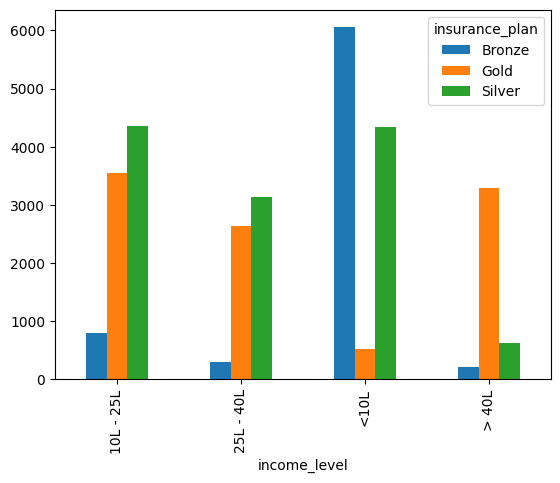

In [31]:
crosstab.plot(kind = 'bar')

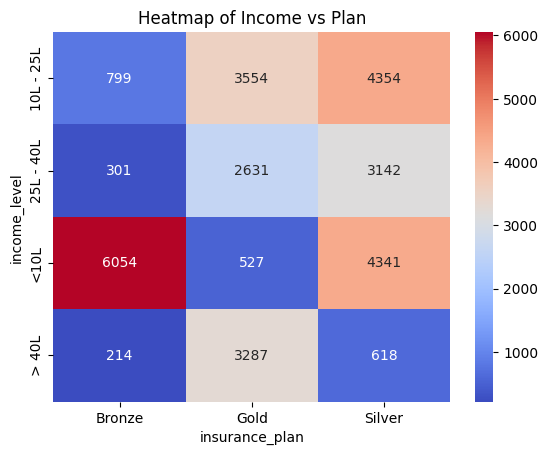

In [32]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [33]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [34]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

## Risk score calculation

In [35]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

# Split medical history into two separate columns and convert to lowercase
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

# Fill NaN values with 'none'
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

# Initialize total risk score to 0
df2['total_risk_score'] = 0

# Calculate the total risk score
for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

# Display the resulting DataFrame
print(df2.head(2))

   age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   

  smoking_status employment_status income_level  income_lakhs medical_history  \
0     No Smoking          Salaried         <10L             6        Diabetes   
1        Regular          Salaried         <10L             6        Diabetes   

  insurance_plan  annual_premium_amount  genetical_risk  disease1 disease2  \
0         Bronze                   9053               0  diabetes     none   
1         Bronze                  16339               0  diabetes     none   

   total_risk_score  normalized_risk_score  
0                 6               0.428571  
1                 6               0.428571  


In [36]:
df3 = df2.drop(["disease1","disease2","total_risk_score","medical_history"], axis = "columns")
df3.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Bronze,9053,0,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Bronze,16339,0,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,Silver,18164,0,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,Gold,20303,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Bronze,15610,0,0.428571


In [37]:
df3["income_level"] = df3["income_level"].map({'<10L' : 1, '10L - 25L' : 2, '> 40L' : 3, '25L - 40L' : 4 })
df3["income_level"].unique()

array([1, 2, 3, 4])

In [38]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df3["insurance_plan"].unique()

array([1, 2, 3])

In [39]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df3, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29822 non-null  int64  
 1   number_of_dependants             29822 non-null  int64  
 2   income_level                     29822 non-null  int64  
 3   income_lakhs                     29822 non-null  int64  
 4   insurance_plan                   29822 non-null  int64  
 5   annual_premium_amount            29822 non-null  int64  
 6   genetical_risk                   29822 non-null  int64  
 7   normalized_risk_score            29822 non-null  float64
 8   gender_Male                      29822 non-null  int64  
 9   region_Northwest                 29822 non-null  int64  
 10  region_Southeast                 29822 non-null  int64  
 11  region_Southwest                 29822 non-null  int64  
 12  marital_status_Unmarrie

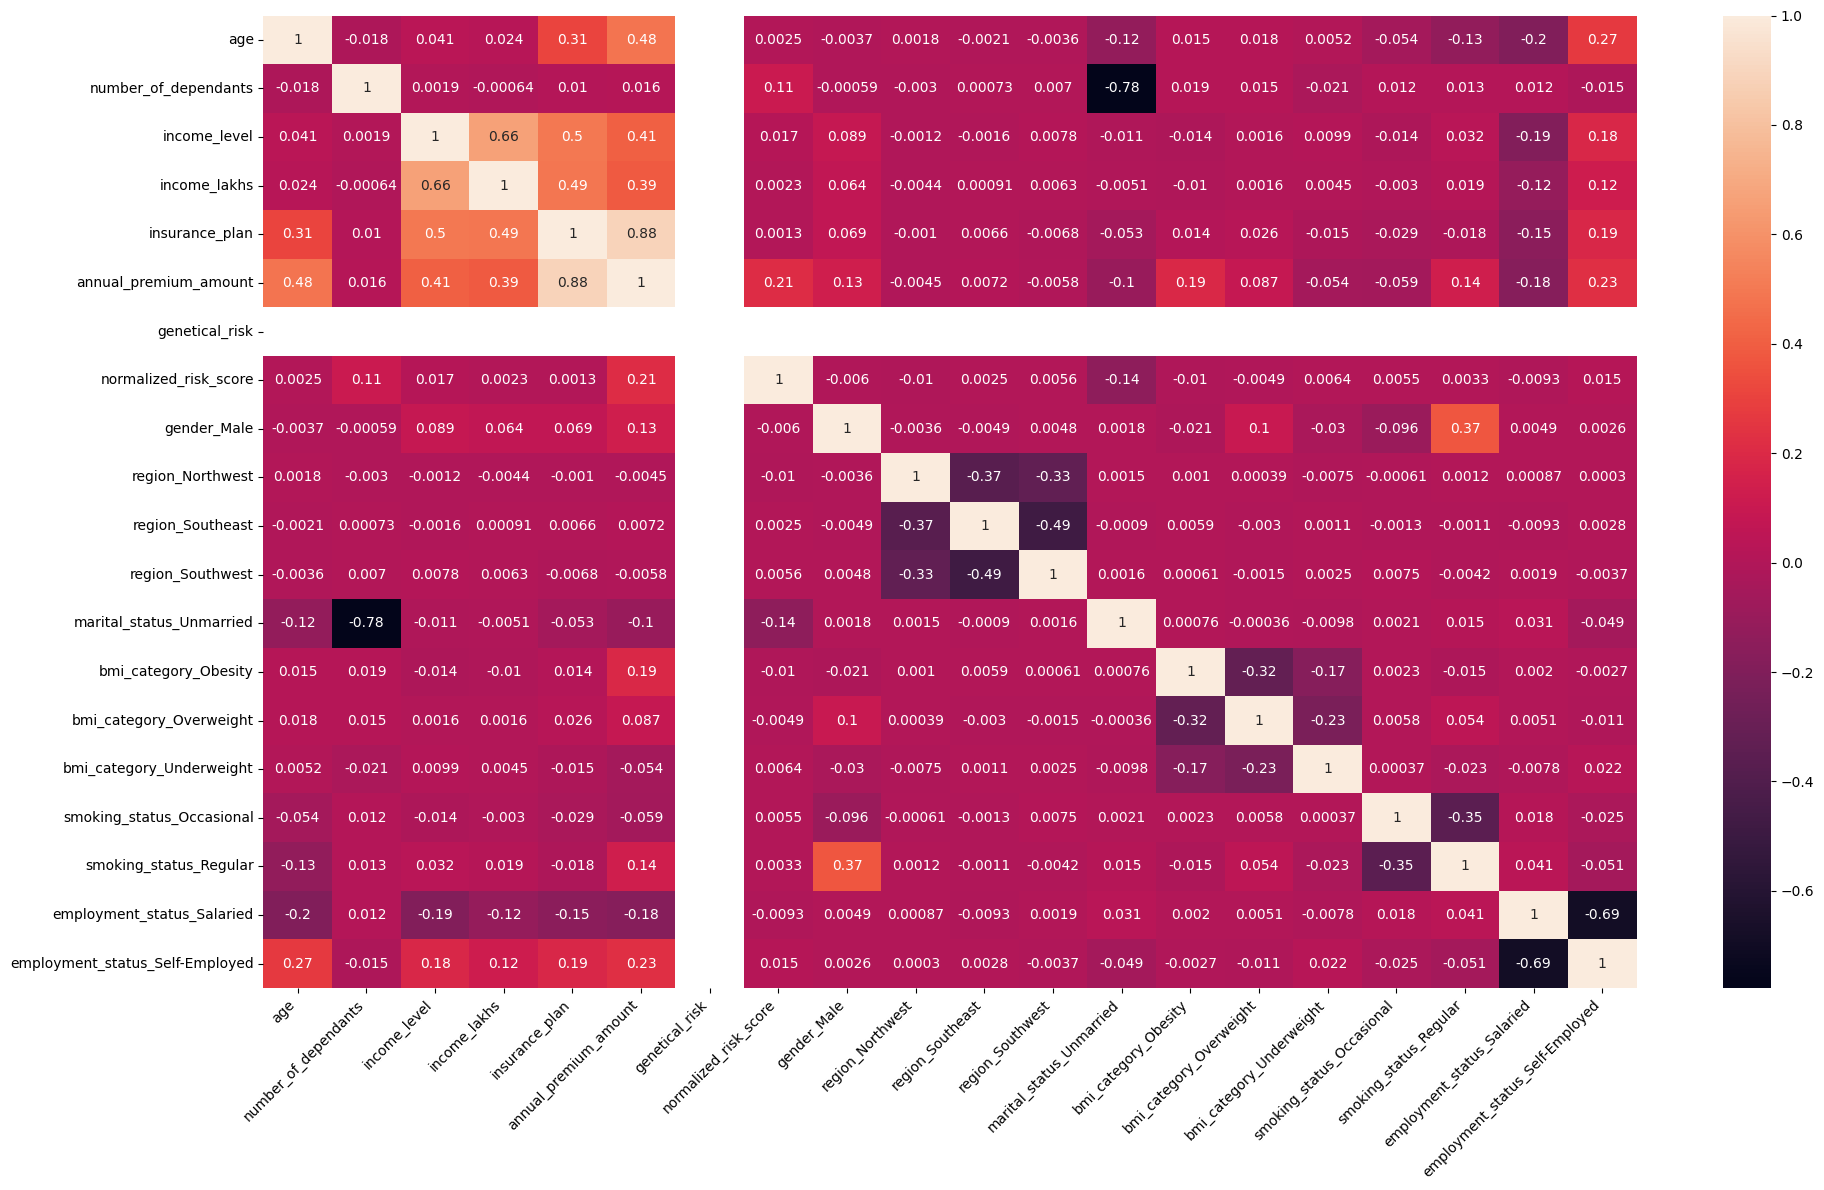

In [41]:
cm = df3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop("annual_premium_amount", axis = 1)
y = df3["annual_premium_amount"]
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.666667,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [44]:
calculate_vif(X)

C:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
0,age,3.882319
1,number_of_dependants,6.292550
2,income_level,4.104266
3,income_lakhs,3.797992
4,insurance_plan,4.931114
5,genetical_risk,NaN
6,normalized_risk_score,3.815157
7,gender_Male,2.599039
8,region_Northwest,2.124859
9,region_Southeast,2.981854


<h2 align="center" style="color:blue">Model Traning</h2>

In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr_train_score = model_lr.score(X_train, y_train)
model_lr_test_score = model_lr.score(X_test, y_test)
print(f'Linear Regression Train Score: {model_lr_train_score}')
print(f'Linear Regression Test Score: {model_lr_test_score}')

Linear Regression Train Score: 0.9530043610239997
Linear Regression Test Score: 0.9551743760287583


In [46]:
model_lr.intercept_

np.float64(5930.462288299272)

In [47]:
model_lr.coef_

array([ 6.99834498e+03, -1.25113023e+03, -3.18398341e+01, -7.31701183e+02,
        1.48457671e+04,  1.81898940e-12,  6.01953595e+03,  5.44888162e+01,
       -6.81280249e+01, -2.24248870e+01, -4.44254328e+01, -7.00233874e+02,
        3.93345605e+03,  1.99881999e+03,  5.96764344e+02,  8.50116895e+02,
        2.81495760e+03, -6.97519451e+01,  2.48995648e+02])

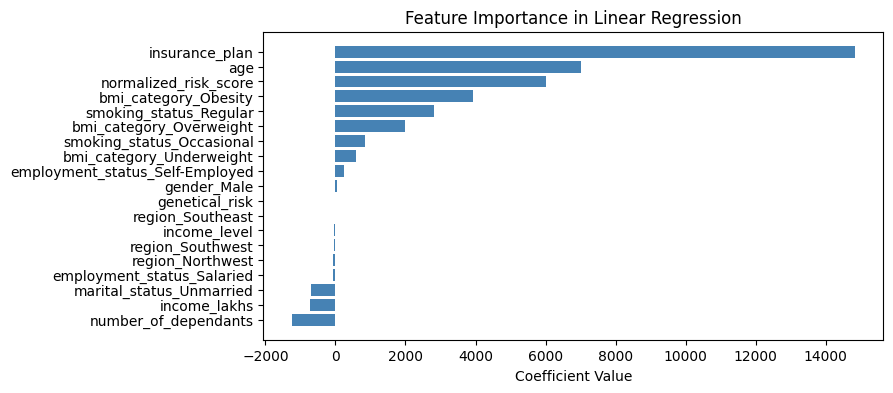

In [48]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [49]:
# Lasso Regression
model_la = Lasso(alpha = 0.1)
model_la.fit(X_train, y_train)
model_la_train_score = model_la.score(X_train, y_train)
model_la_test_score = model_la.score(X_test, y_test)
print(f'Lasso Regression Train Score: {model_la_train_score}')
print(f'Lasso Regression Test Score: {model_la_test_score}')

Lasso Regression Train Score: 0.953004302567231
Lasso Regression Test Score: 0.9551756420166144


In [50]:
# Ridge Regression
model_rg = Ridge(alpha = 0.1)
model_rg.fit(X_train, y_train)
model_rg_train_score = model_rg.score(X_train, y_train)
model_rg_test_score = model_rg.score(X_test, y_test)
print(f'Ridge Regression Train Score: {model_rg_train_score}')
print(f'Ridge Regression Test Score: {model_rg_test_score}')

Ridge Regression Train Score: 0.9530043595275685
Ridge Regression Test Score: 0.9551743207064017


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest
rf_param_distributions = {
    'n_estimators': [50, 100, 150],  # Specify a list of values instead of a range
    'max_features': ['sqrt'],        # Keep only 'sqrt' for simplicity
    'max_depth': randint(5, 15),     # Limit max_depth
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit Random Forest with preprocessed data
rf_random_search.fit(X_train, y_train)

# Print best parameters for Random Forest
print("Best parameters for Random Forest:")
print(rf_random_search.best_params_)
print("Best Score for Random Forest:")
print(rf_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest:
{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 150}
Best Score for Random Forest:
0.9839845500703602


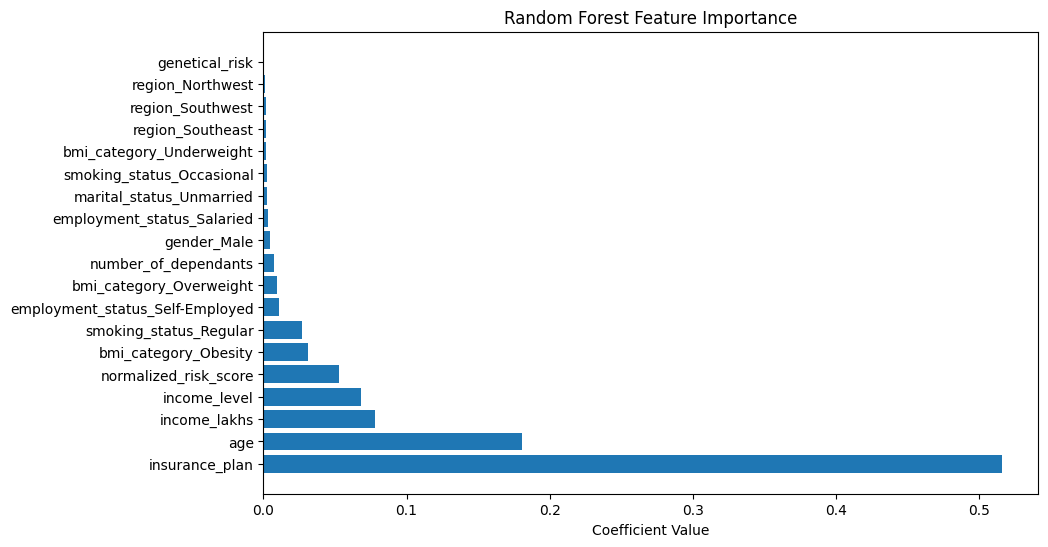

In [52]:
best_rf = rf_random_search.best_estimator_
rf_importances = best_rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(X.shape[1]), rf_importances[rf_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[rf_indices])
plt.xlabel('Coefficient Value')
plt.show()


## XGBoost

In [53]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the simplified hyperparameter grid for XGBoost
xgb_param_distributions = {
    'n_estimators': [50, 100],        # List of common values for n_estimators
    'max_depth': [3, 5, 7],           # Limit max_depth
    'learning_rate': uniform(0.01, 0.19),  # Learning rate between 0.01 and 0.2
    'subsample': uniform(0.5, 0.5),       # Subsample between 0.5 and 1
}

# Set up RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit XGBoost
xgb_random_search.fit(X_train, y_train)

# Print best parameters for XGBoost
print("Best parameters for XGBoost:")
print(xgb_random_search.best_params_)
print("Best Score for XGBoost:")
print(xgb_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Python312\Lib\site-packages\xgboost\sklearn.py", line 1081, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python31

Best parameters for XGBoost:
{'learning_rate': np.float64(0.15727523643861177), 'max_depth': 5, 'n_estimators': 100, 'subsample': np.float64(0.9474136752138245)}
Best Score for XGBoost:
0.998093863328298


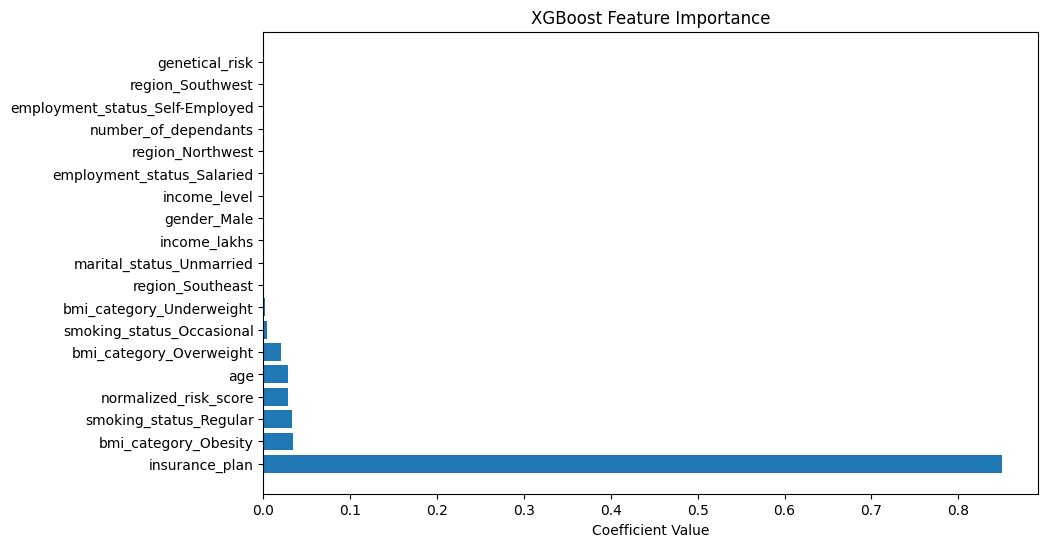

In [54]:
best_xgb = xgb_random_search.best_estimator_

# Get feature importances
importances = best_xgb.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

best_xgb = xgb_random_search.best_estimator_

xgb_importances = best_xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Feature Importance Plot for XGBoost
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.barh(range(X.shape[1]), xgb_importances[xgb_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[xgb_indices])
plt.xlabel('Coefficient Value')
plt.show()

<h2 align = "center" style = "color : blue">Error Analysis</h2>

In [55]:
y_pred = best_xgb.predict(X_test)
residuals = y_pred-y_test
residuals_pct = (residuals/y_test)*100
results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.sample(5)

,actual,predicted,diff,diff_pct
6971,10731,11075.425781,344.425781,3.209634
23368,20627,20569.009766,-57.990234,-0.281138
16122,20445,20589.740234,144.740234,0.707949
4917,16720,16636.652344,-83.347656,-0.498491
8934,34426,34743.027344,317.027344,0.920895


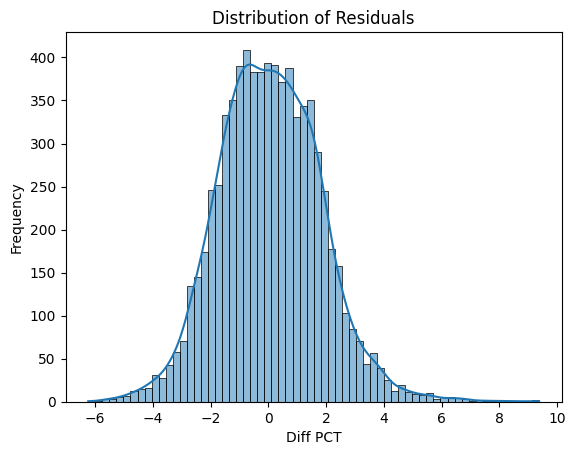

In [56]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [57]:
extreme_error_threshold = 10
extreme_result_df= results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_result_df.shape

(0, 4)

In [58]:
extreme_error_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.0

In [59]:
extreme_result_df[abs(extreme_result_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


In [60]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


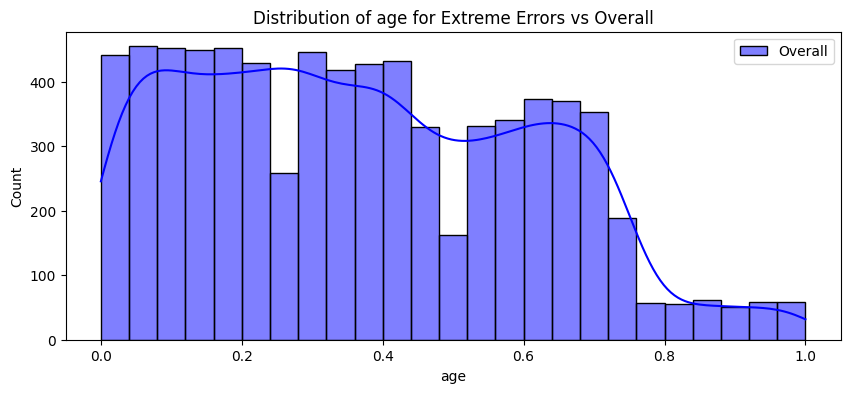

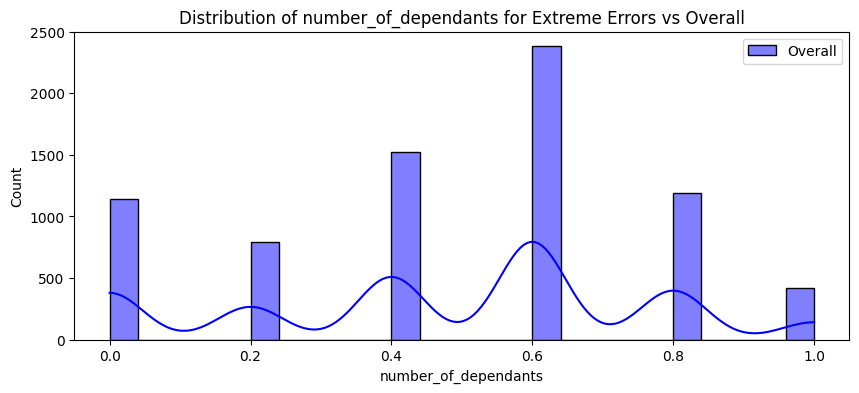

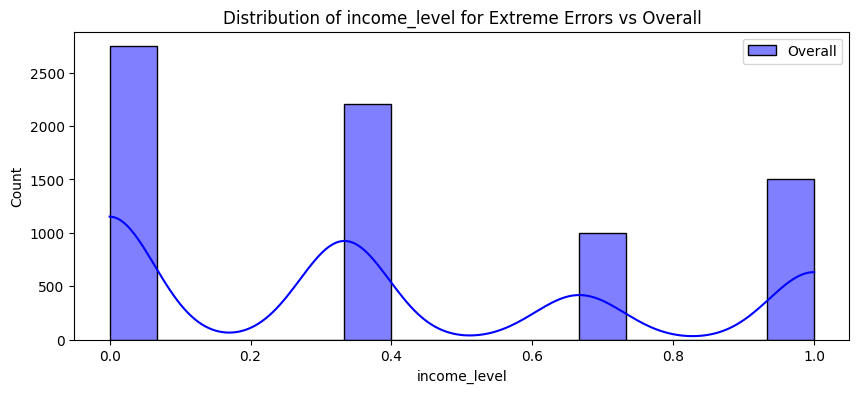

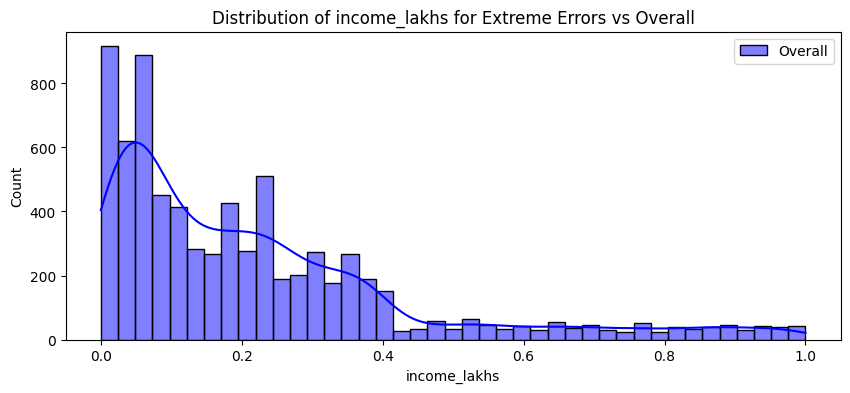

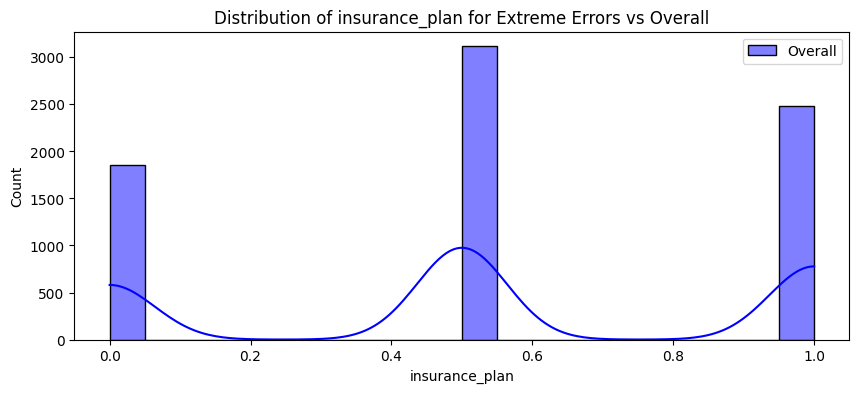

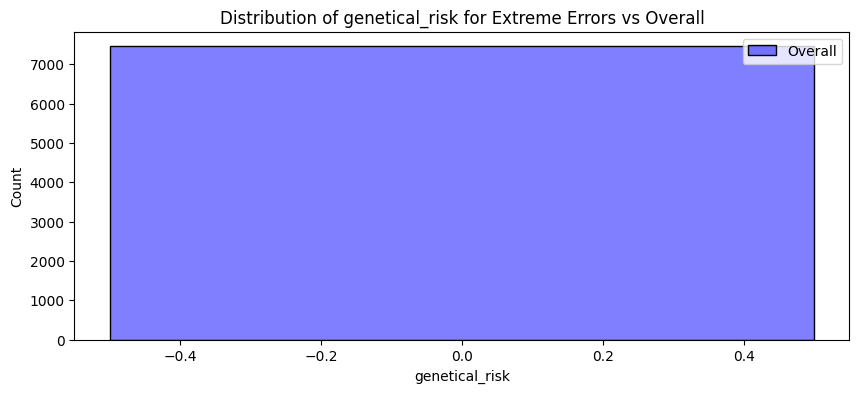

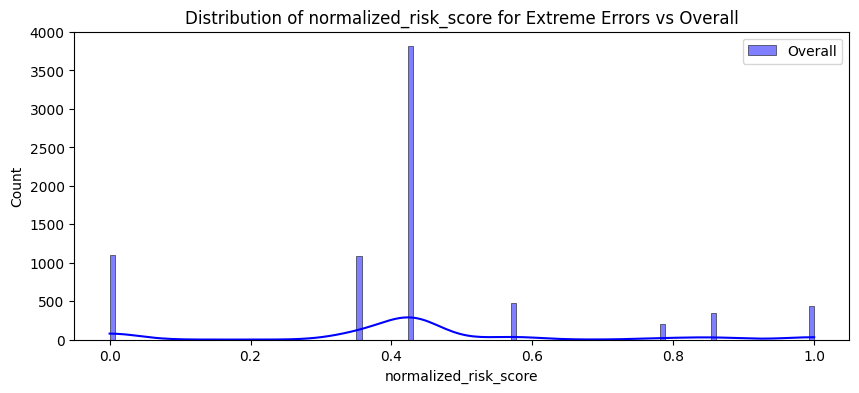

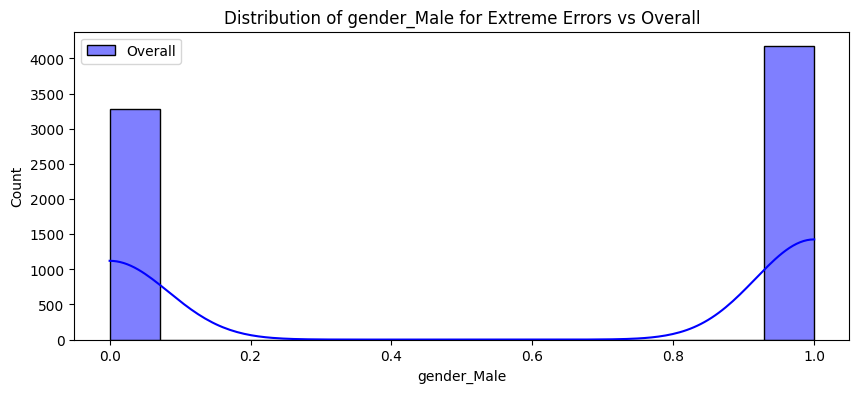

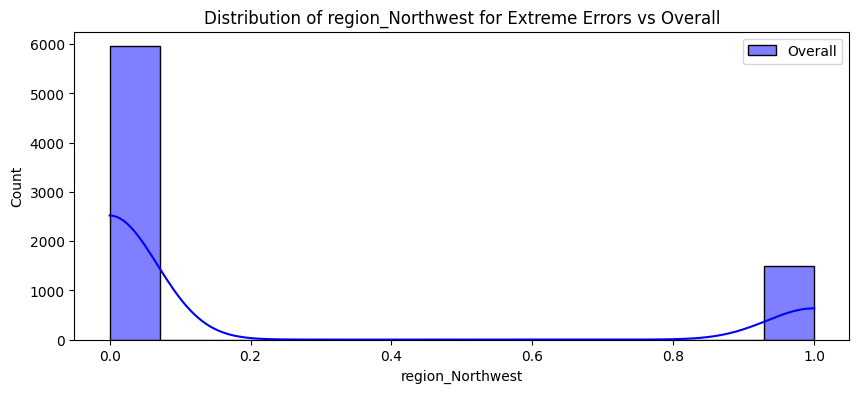

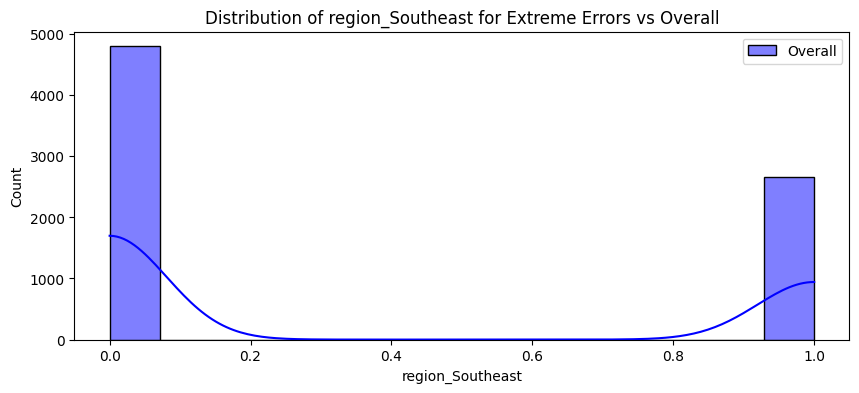

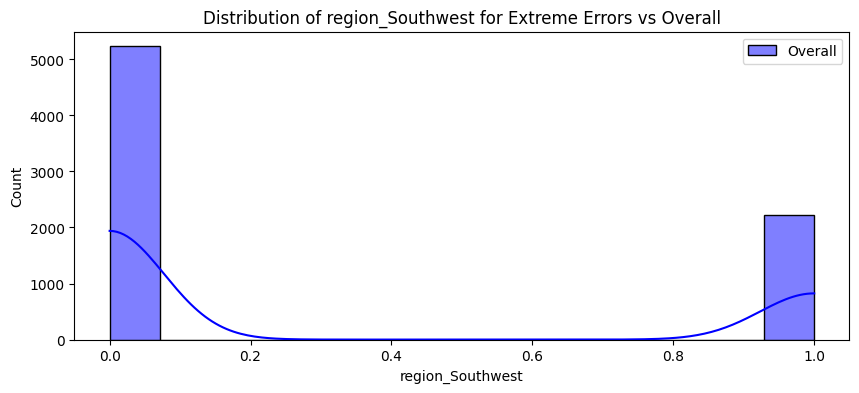

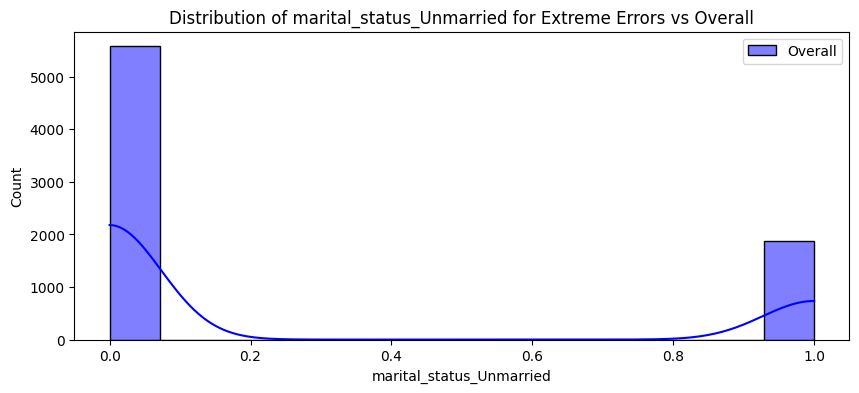

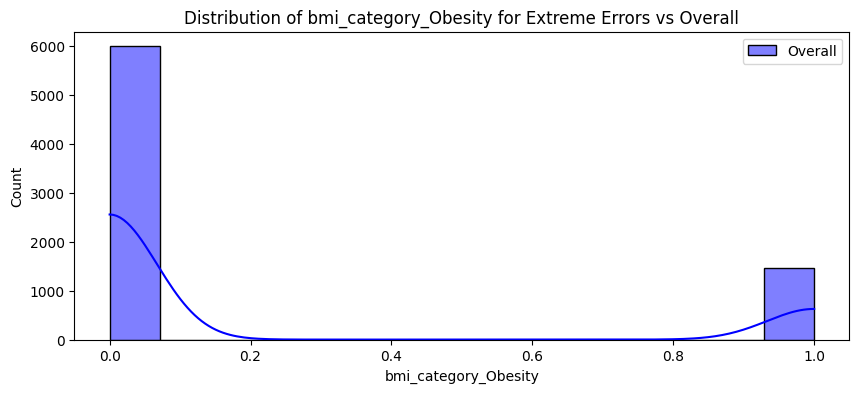

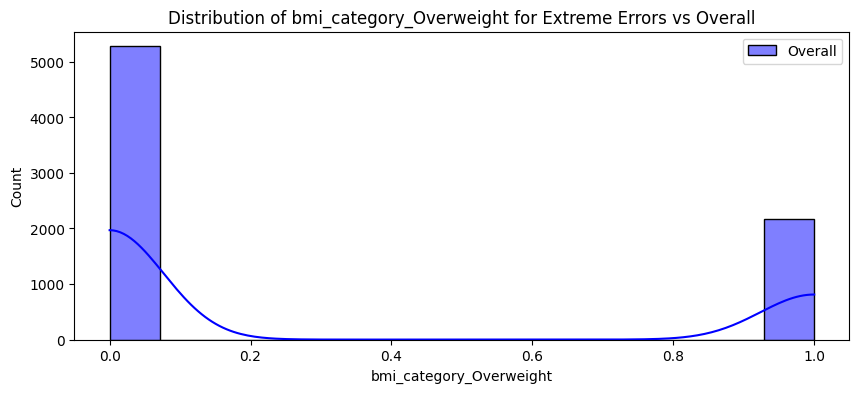

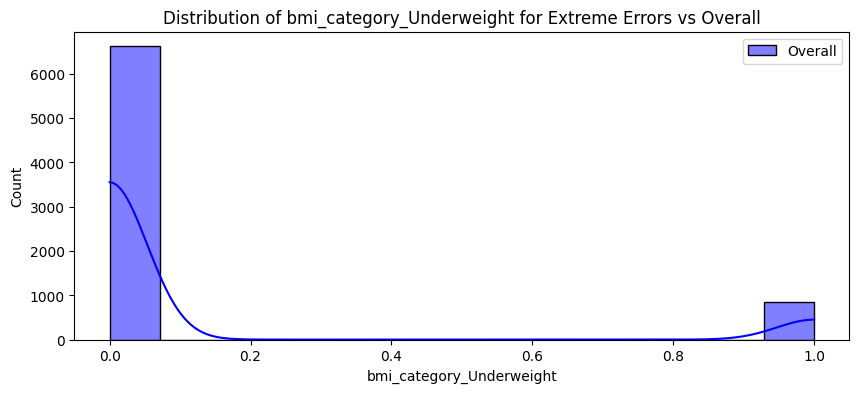

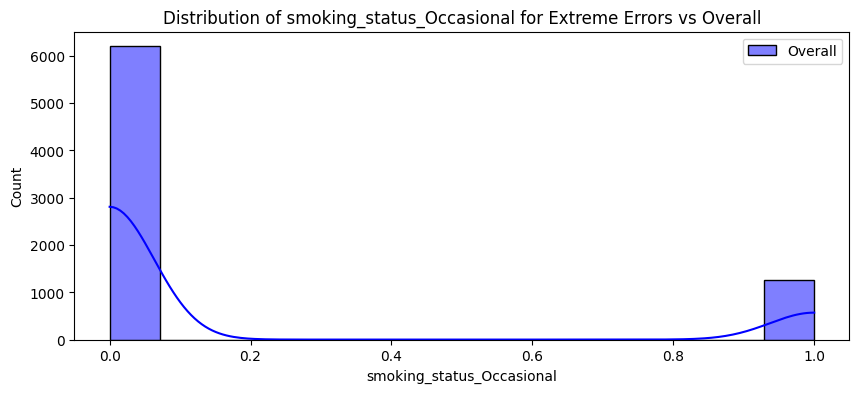

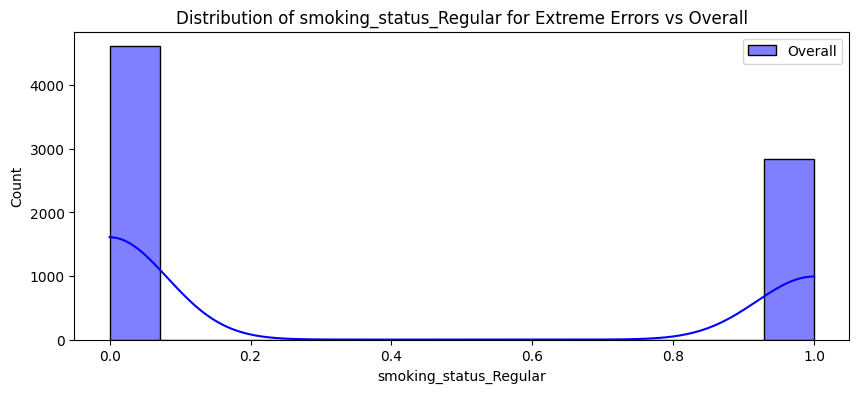

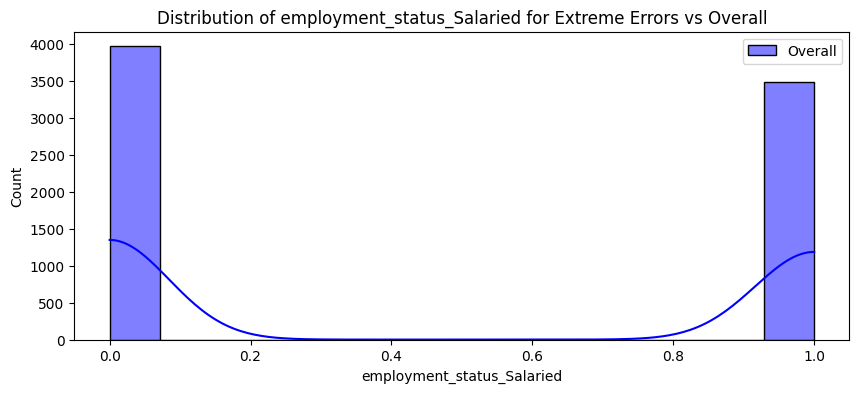

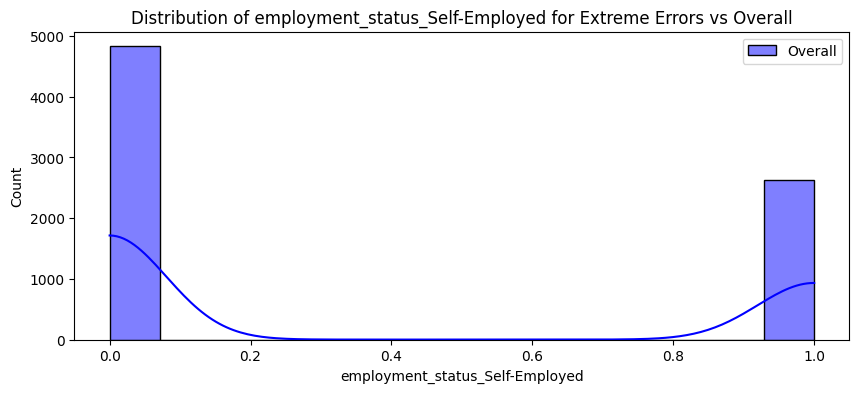

In [61]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

<h2 align = 'center' style = 'color : blue'> Exporting the Model</h2>

In [62]:
from joblib import dump

In [63]:
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale' : cols_to_scale
}

In [64]:
dump(best_xgb, "Artifacts/model_rest.joblib")
dump(scaler_with_cols, "Artifacts/scaler_rest.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'Artifacts/model_rest.joblib'